# Generating Punks with a Variational Autoencoder

In [1]:
import sys
import os
import numpy as np
# from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
import matplotlib.pyplot as plt
import pickle
from matplotlib.colors import rgb2hex
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load pallets library

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))  # uncomment to run nb from 'pallets/nb'
# sys.path.append(os.path.abspath(os.getcwd()))                    # uncomment to run from project root

from pallets import images as I, datasets as DS, models as M


In [3]:
# To GPU, or not to GPU

device = M.get_device(require_gpu=True)


## Prepare Datasets

In [4]:
# dataset = DS.CPunksDataset(device=device, test_size=0)

all_colors = I.get_punk_colors()
mapper = DS.ColorOneHotMapper(all_colors)
dataset = DS.OneHotEncodedImageDataset(mapper, device=device, test_size=1000)


In [5]:
batch_size = 32
num_workers = 0

train_sampler = SubsetRandomSampler(dataset.train_idx)
test_sampler = SubsetRandomSampler(dataset.test_idx)

train_loader = DataLoader(
    dataset, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers
)
test_loader = DataLoader(
    dataset, batch_size=batch_size, sampler=test_sampler, num_workers=num_workers
)


## Convolutional VAE

In [8]:
# Cue training montage

model = M.vae.VAE(222, (64, 32), 20).to(device)
criterion = M.vae.Loss().to(device)

train_losses, test_losses = M.vae.train(
    device, model, criterion, train_loader, test_loader,
    learn_rate=1e-03, epochs=40
)


epoch 1 (0%)	 loss: 31949.107422
epoch 1 (35%)	 loss: 260.553925
epoch 1 (71%)	 loss: 243.327164
epoch 1 (100%)	 loss: 830.198145
epoch 1 test	 loss: 214.274795
epoch 2 (0%)	 loss: 215.800171
epoch 2 (35%)	 loss: 220.008774
epoch 2 (71%)	 loss: 200.514755
epoch 2 (100%)	 loss: 203.075368
epoch 2 test	 loss: 192.961199
epoch 3 (0%)	 loss: 200.541153
epoch 3 (35%)	 loss: 182.495865
epoch 3 (71%)	 loss: 177.396423
epoch 3 (100%)	 loss: 182.938855
epoch 3 test	 loss: 172.174372
epoch 4 (0%)	 loss: 171.031845
epoch 4 (35%)	 loss: 181.067017
epoch 4 (71%)	 loss: 169.630585
epoch 4 (100%)	 loss: 166.994334
epoch 4 test	 loss: 161.581150
epoch 5 (0%)	 loss: 158.127197
epoch 5 (35%)	 loss: 161.786362
epoch 5 (71%)	 loss: 146.418671
epoch 5 (100%)	 loss: 159.241402
epoch 5 test	 loss: 153.958063
epoch 6 (0%)	 loss: 161.131821
epoch 6 (35%)	 loss: 158.474838
epoch 6 (71%)	 loss: 147.803024
epoch 6 (100%)	 loss: 150.058158
epoch 6 test	 loss: 140.823260
epoch 7 (0%)	 loss: 152.632309
epoch 7 (35%)

In [9]:
# M.save(model, 'jaems.pkl')
# model = M.load('jaems.pkl')


In [10]:
# Generate new image

z = torch.randn(1, 20).to(device)
with torch.no_grad():
    model.eval()
    generated_image = model.decode(z)
    print(generated_image.shape)


decoded_one_hot = generated_image[0]
print(decoded_one_hot.shape)


torch.Size([1, 222, 24, 24])
torch.Size([222, 24, 24])


torch.Size([4, 24, 24])


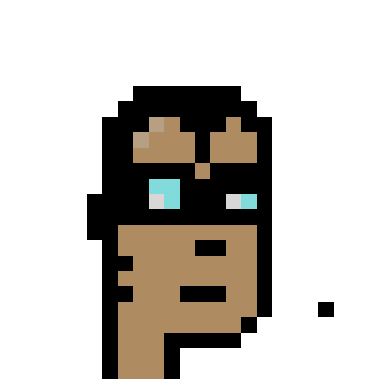

In [11]:
decoded = DS.one_hot_to_rgba(decoded_one_hot, mapper)
print(decoded.shape)

plt.imshow(transforms.functional.to_pil_image(decoded))
plt.axis('off')
plt.show()


In [12]:
train_losses


[26495.685468092033,
 6481.128753012799,
 5838.474086463874,
 5329.606389471825,
 5082.172390119404,
 4789.090148925781,
 4022.181546691462,
 3567.9675024587214,
 3307.8849783823,
 3142.750495423662,
 3014.620823636968,
 2914.1180634194234,
 2755.036228693969,
 2614.4061396172706,
 2523.7530762151623,
 2456.1341286517204,
 2407.5960759372574,
 2342.917900788869,
 2290.7484914360316,
 2226.443114043973,
 2158.0426239662984,
 2093.468212371177,
 2052.4029831040834,
 1986.3117664959414,
 1933.5218794802402,
 1900.3897415052913,
 1812.6045100435297,
 1720.2381648070423,
 1673.1484667189577,
 1637.2135888498726,
 1592.094195859652,
 1559.9182916735926,
 1509.724525397551,
 1466.4934365563358,
 1425.4622782172887,
 1393.935586915794,
 1351.8869527180989,
 1333.1836372537816,
 1297.7180294821449,
 1285.916952146706]

In [13]:
test_losses


[6696.087341308594,
 6030.037479400635,
 5380.449138641357,
 5049.410942077637,
 4811.189464569092,
 4400.726860046387,
 3635.7075386047363,
 3335.8986949920654,
 3116.7945709228516,
 2961.24857711792,
 2903.251735687256,
 2818.538589477539,
 2643.5657863616943,
 2585.3198623657227,
 2464.365921020508,
 2359.514980316162,
 2315.515130996704,
 2292.251043319702,
 2232.443576812744,
 2161.0333003997803,
 2103.1882038116455,
 2042.287618637085,
 1987.9749298095703,
 1924.3349647521973,
 1955.5927801132202,
 1849.03635597229,
 1734.7874937057495,
 1684.2178344726562,
 1705.1923732757568,
 1591.0008974075317,
 1575.034906387329,
 1503.4433212280273,
 1470.8554420471191,
 1425.6879234313965,
 1373.5618991851807,
 1319.7753791809082,
 1308.9475479125977,
 1298.4154901504517,
 1322.0415630340576,
 1228.6561164855957]

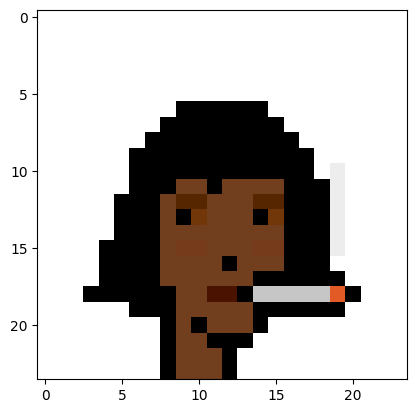

In [14]:
punk = I.get_punk_tensor(1000)

plt.imshow(transforms.functional.to_pil_image(punk))
plt.show()



torch.Size([1, 222, 24, 24])


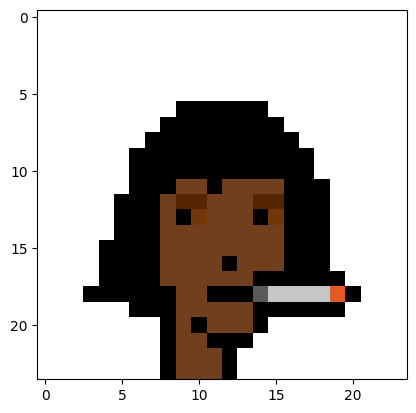

In [15]:
punk = I.get_punk_tensor(1000)

p = DS.rgba_to_one_hot(punk, mapper)
p = p.unsqueeze(0)

model.eval()
with torch.no_grad():
    reconstructed, mu, logcar = model.forward(p.to(device))
    print(reconstructed.shape)

recon_punk = reconstructed[0].cpu()
recon_punk = DS.one_hot_to_rgba(recon_punk, mapper)
plt.imshow(transforms.functional.to_pil_image(recon_punk.cpu()))
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

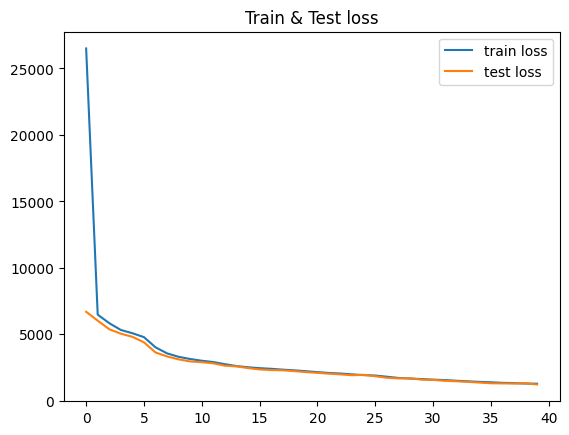

In [16]:
plt.title("Train & Test loss")
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show
